   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0
[1.1 1.3 1.5 2.  2.2] [39343. 46205. 37731. 43525. 39891.]
Média de salários: 76003.0
Média de experiência: 5.3133333333333335 em anos
O salário médio dos funcionários com mais de 5 anos: 101316.07142857143


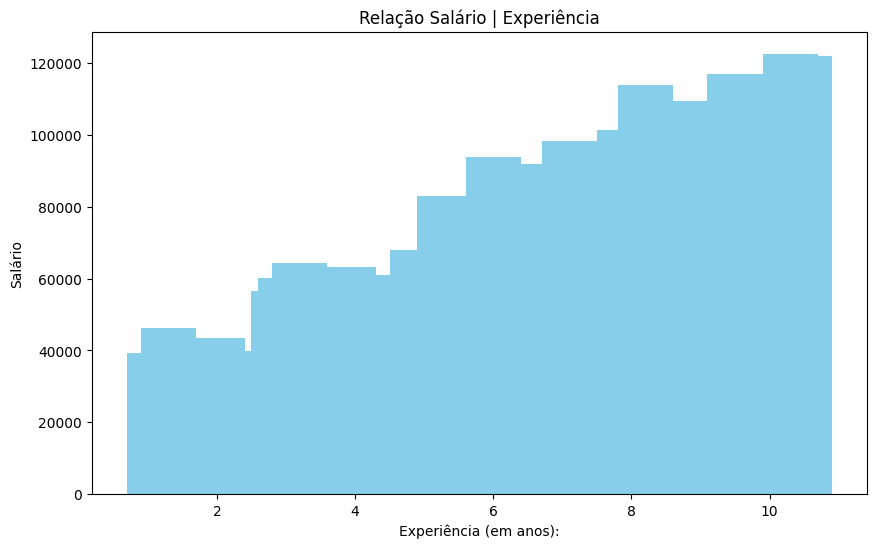

Salários após aumento(10%):
[ 43277.3  50825.5  41504.1  47877.5  43880.1  62306.2  66165.   59889.5
  70889.5  62907.9  69539.8  61373.4  62652.7  62789.1  67222.1  74731.8
  72631.9  91396.8  89499.3 103334.  100911.8 108100.3 111432.2 125193.2
 120374.1 116140.2 128665.9 123898.5 134630.1 134059.2]


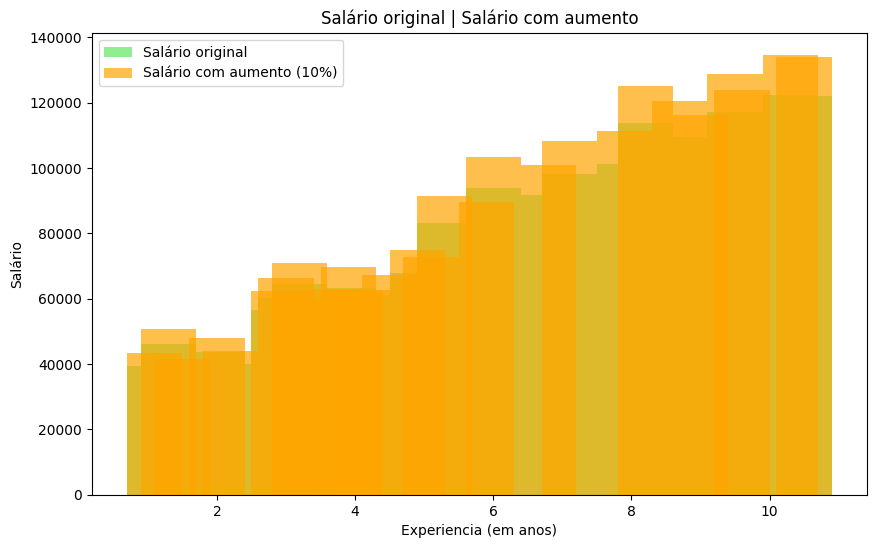

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Leitura
df = pd.read_csv("Salary_data.csv")
print(df.head())

# Converter dados para array
experience = df['YearsExperience'].to_numpy()
salary = df['Salary'].to_numpy()

print(experience[:5], salary[:5])

# Calculo média dos salários
mean_salary = np.mean(salary)
print(f"Média de salários: {mean_salary}")

# Calculo média da experiência
mean_experience = np.mean(experience)
print(f"Média de experiência: {mean_experience} em anos")

# Filtro funcionários mais que 5 anos
salary_above_5years = salary[experience > 5]

# Salário médio acima de 5 anos
mean_salary_above_5_years = np.mean(salary[experience > 5])
print(f"O salário médio dos funcionários com mais de 5 anos: {mean_salary_above_5_years}")

# Criar gráfico barras
plt.figure(figsize=(10, 6))
plt.bar(experience, salary, color='skyblue')
plt.title("Relação Salário | Experiência")
plt.xlabel('Experiência (em anos):')
plt.ylabel('Salário')
plt.show()

# Aumento 10% salários
salary_increase = salary *1.10

# Mostrar novo salário
print("Salários após aumento(10%):")
print(salary_increase)

# Gráfico comparação salários (originais e com aumento)

plt.figure(figsize=(10, 6))
plt.bar(experience, salary, color='lightgreen', label='Salário original')
plt.bar(experience, salary_increase, color='orange', alpha=0.7, label="Salário com aumento (10%)")
plt.title('Salário original | Salário com aumento')
plt.xlabel('Experiencia (em anos)')
plt.ylabel('Salário')
plt.legend()
plt.show()

10 primeiros itens do dataset:
   index        id                            title   type  \
0      0   tm84618                      Taxi Driver  MOVIE   
1      1  tm127384  Monty Python and the Holy Grail  MOVIE   
2      2   tm70993                    Life of Brian  MOVIE   
3      3  tm190788                     The Exorcist  MOVIE   
4      4   ts22164     Monty Python's Flying Circus   SHOW   
5      5   tm14873                      Dirty Harry  MOVIE   
6      6  tm185072                     My Fair Lady  MOVIE   
7      7   tm98978                  The Blue Lagoon  MOVIE   
8      8  tm119281                 Bonnie and Clyde  MOVIE   
9      9   tm67378                The Professionals  MOVIE   

                                         description  release_year  \
0  A mentally unstable Vietnam War veteran works ...          1976   
1  King Arthur, accompanied by his squire, recrui...          1975   
2  Brian Cohen is an average young Jewish man, bu...          1979   
3  12-

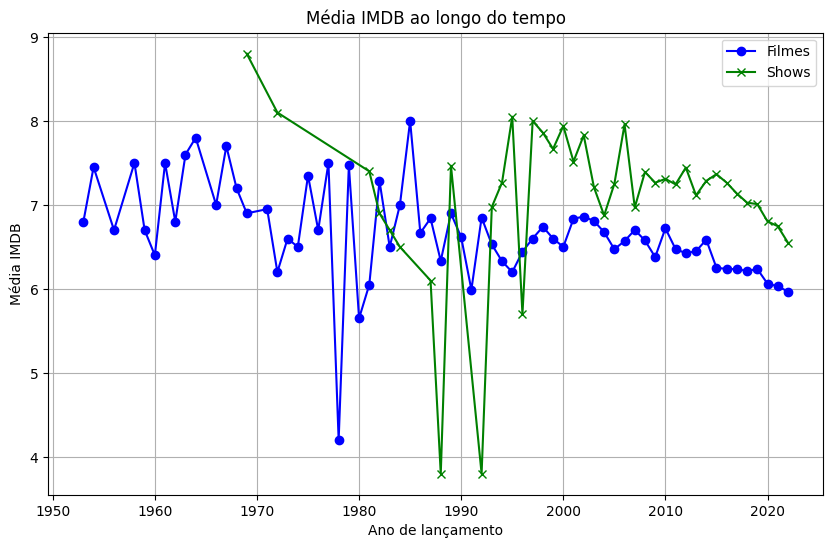

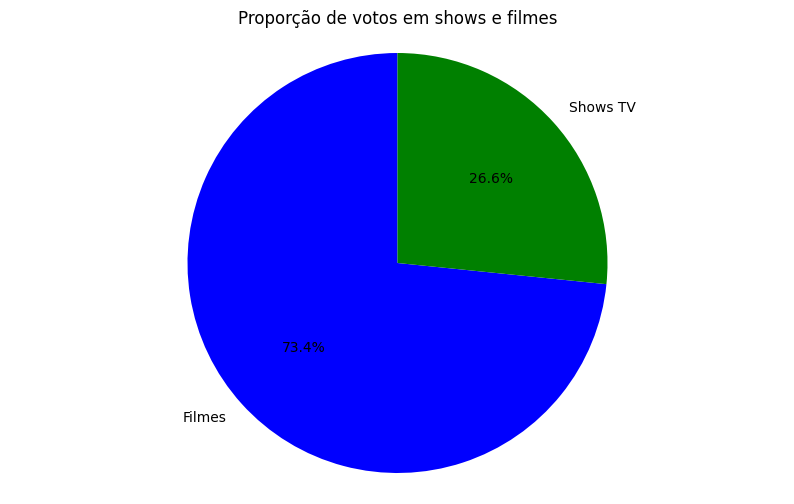

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Leitura
df = pd.read_csv('Netflix TV Shows and Movies.csv')

# Converter dados para array
movies = df[df['type'] == 'MOVIE']
shows = df[df['type'] == 'SHOW']

# Printar 10 itens do início do dataset
print("10 primeiros itens do dataset:")
print(df.head(10))

# Printar 10 itens do final do dataset
print("10 últimos itens do dataset:")
print(df.tail(10))

# Pegar filme com maior imdb e o com menor
max_imdb = df[df['imdb_score'] == df['imdb_score'].max()][['title', 'imdb_score']]
min_imdb = df[df['imdb_score'] == df['imdb_score'].min()][['title', 'imdb_score']]

print("Filme com maior IMDB:")
print(max_imdb)

print("Filme com menor IMDB:")
print(min_imdb)

# Coluna runtime para numérico
df['runtime'] = pd.to_numeric(df['runtime'], errors='coerce')

# Calculo duração média
mean_movie_runtime = movies['runtime'].mean()
mean_show_runtime = shows['runtime'].mean()

print(f"A média da duração de filmes é: {mean_movie_runtime:.2f} minutos")
print(f"A média de duração dos shows de TV é: {mean_show_runtime:.2f} minutos")

# Show TV com maior duração por episódio e filme com maior duração
longest_show = shows[shows['runtime'] == shows['runtime'].max()]
longest_movie = movies[movies['runtime'] == movies['runtime'].max()]

if not longest_show.empty:
    print("Show de TV com maior duração por episódio:")
    print(longest_show[['title', 'runtime']])
else:
    print("Não foi possível encontrar shows com duração válida.")

if not longest_movie.empty:
    print("Filme com maior duração:")
    print(longest_movie[['title', 'runtime']])
else:
    print("Não foi possível encontrar filmes com duração válida.")

# Ano com mais filmes avaliados
df = df.dropna(subset=['release_year'])
movies_by_year = movies.groupby('release_year')['imdb_score'].count()

if not movies_by_year.empty:
    max_movies_year = movies_by_year.idxmax()
    print(f"Ano com mais filmes avaliados no IMDB: {max_movies_year}")
else:
    print("Sem dados suficientes para calcular ano com mais filmes.")

# Categorias de idade e quantidade de filmes por categoria
age_certification_counts = df['age_certification'].value_counts()
print("Categorias de idade e quantidade de filmes ou shows por categoria:")
print(age_certification_counts)

# Campos vazios e quantidade de vazios
missing_data = df.isnull().sum()
print("Colunas nulas:")
print(missing_data[missing_data > 0])

# Gráfico média IMDB ao longo do tempo
plt.figure(figsize=(10, 6))
movies_by_year_score = movies.groupby('release_year')['imdb_score'].mean()
shows_by_year_score = shows.groupby('release_year')['imdb_score'].mean()

plt.plot(movies_by_year_score.index, movies_by_year_score.values, label='Filmes', color='b', marker='o')
plt.plot(shows_by_year_score.index, shows_by_year_score.values, label="Shows", color='g', marker='x')

plt.title("Média IMDB ao longo do tempo")
plt.xlabel('Ano de lançamento')
plt.ylabel('Média IMDB')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico proporção de votos em shows e filmes
plt.figure(figsize=(10, 6))
votes_movies = movies['imdb_votes'].sum()
votes_shows = shows['imdb_votes'].sum()

labels = ['Filmes', 'Shows TV']
sizes = [votes_movies, votes_shows]
colors = ['blue', 'green']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Proporção de votos em shows e filmes')
plt.axis('equal')
plt.show()
